# CMPE 297 - Assignment 4 - Part 1  
##Deep AutoVIML - NLP Task (Sentiment Analysis) on Ex President Donald Trump's tweets from 2020 US president election cycle 
[Code Reference](https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb)  



#1.0 Load libraries

In [ ]:
!pip install deep_autoviml

     |████████████████████████████████| 269 kB 5.0 MB/s 
     |████████████████████████████████| 4.4 MB 55.3 MB/s 
     |████████████████████████████████| 308 kB 67.0 MB/s 
     |████████████████████████████████| 170 kB 80.3 MB/s 
     |████████████████████████████████| 14.5 MB 55.8 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 209 kB 68.2 MB/s 
     |████████████████████████████████| 75 kB 5.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 144 kB 69.4 MB/s 
     |████████████████████████████████| 111 kB 75.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=bebb91df79dfdb17cce18951ad260cd0c1564721ed93a54539ba333ac253aa25
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import pandas as pd
import numpy as np


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


#2.0 Read President Trump's tweets

In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in tweets referencing Donald Trump
df_trump = pd.read_csv('/content/drive/My Drive/255/datasets/hashtag_donaldtrump.csv', lineterminator='\n', parse_dates=True)
df = df_trump.sample(frac=.05)

##2.1 Perform Vader Sentiment Analysis

In [ ]:
# Function to capture sentiments by polarity
def sentiment(data):
    temp=[]
    for row in data:
        tmp=sid.polarity_scores(row)
        temp.append(tmp)
    return temp

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Obtain sentiment scores for both Biden and Trump tweets
sid = SentimentIntensityAnalyzer()
df['VADAR']=sentiment(df['tweet'])
df['compound']  = df['VADAR'].apply(lambda score_dict: score_dict['compound'])
df['sentiment']  = df['compound'].apply(lambda x: '3' if x > 0.05 else ('1' if x < -0.05 else '2'))

#3.0 Train/ Test Split

In [34]:
df_train = df[['tweet','sentiment']]
df_train.head(5)

,tweet,sentiment
247819,@evie_stocker @realDonaldTrump @SecPompeo @WHN...,1
171516,"Hey #prolife people, #trump lost people kids ,...",1
100875,How Republican Voters Took QAnon Mainstream ht...,3
720615,#DonaldTrumpIsALoser\nWe know it.\n#Trump know...,3
172747,#trump must have never heard of #TylerPerry #T...,2


In [35]:
target = 'sentiment'
df_train[target].value_counts()

2    21186
1    14022
3    13338
Name: sentiment, dtype: int64

In [36]:
df_test = df_trump.sample(frac=.005)
df_test = df_test[['tweet']]
df_test.head(5)

,tweet
135491,Bei @jensspahn taucht die gleiche Frage auf wi...
483052,du politique #trump \net célébrités\nhttps://t...
92935,Quem (ou o quê) você acredita que motivará no ...
58001,@GeorgeTakei People don't die from covid19 say...
833026,Çocuktan da mı şüpheleniyorlar.?\n#BTC #btctur...


In [37]:
df_test['tweet'].value_counts()

#Trump                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     4
It's OK to be White. #BlackLivesMatter #Feminism #CNN #Trump #Islam #HillaryClinton #BernieSanders #ItsOkToBeWhite #AllLivesMatter                                                                                                                                                                                                                                                                                                                         

#4.0 Deep Auto Vimil

##4.1. Model Config

In [ ]:
target = 'sentiment'
project_name = 'Tweet Sentiments'

keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 10, 'steps_per_epoch': 15, 'class_weight': True}
model_options = {'tuner':"storm", "max_trials":10}

##4.2. Model Train

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 10
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classif

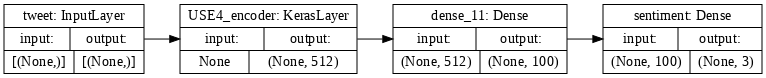

Model plot saved in file: deep_autoviml_Tweet Sentiments_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.1540436456996148, 1: 1.0, 2: 1.213225371120108}
    original datasize = 48546, initial batchsize = 48
    recommended steps per epoch = 505
    recommended OneCycle steps = 10120
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 10, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
  

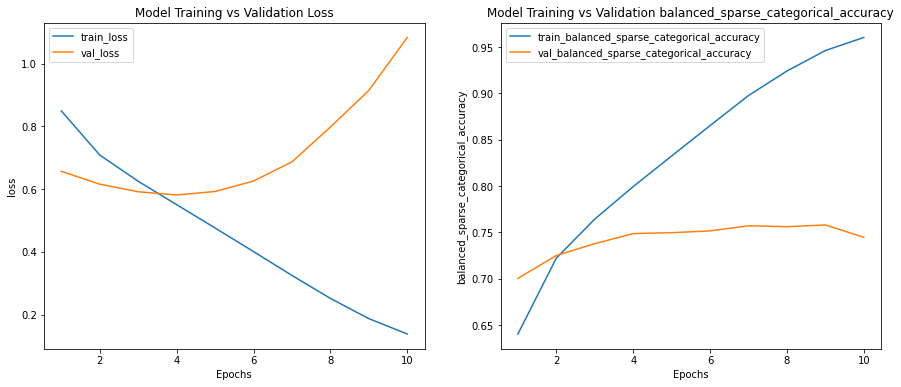


###########################################################
         Held-out test data set Results:
Single Label (single-output), Multi-Class Report: sentiment
#################################################################


    Accuracy          = 77.0%
    Balanced Accuracy (average recall) = 74.5%
    Average Precision (macro) = 76.2%
    Precisions by class:
    76.3%      79.1%      73.3%  
    Recall Scores by class:
    66.8%      89.1%      67.6%  
    F1 Scores by class:
    71.2%      83.8%      70.3%  
#####################################################

Training on full train dataset for 0 epochs. This will take time...
    completed. Time taken (in mins) = 0


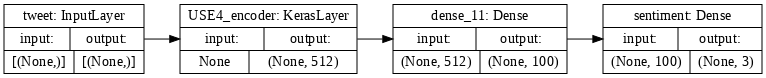

Model plot saved in file: deep_autoviml_Tweet Sentiments_USE_model_after.png


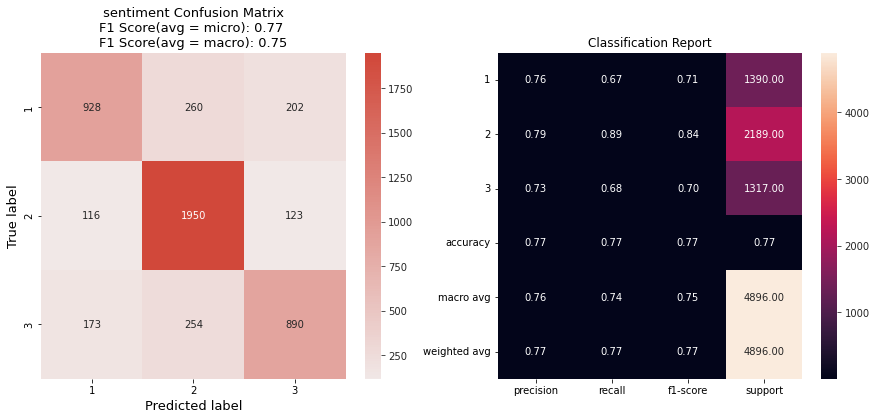

In [ ]:
model, dicti = deepauto.fit(df_train, target, keras_model_type=keras_model_type, 
                            project_name=project_name, save_model_flag=False, 
                            model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

## 4.3. Model Predict

In [ ]:
predictions = deepauto.predict(model, 
                               project_name=project_name, 
                               test_dataset=df_test,
                               keras_model_type=keras_model_type, 
                               cat_vocab_dict=dicti)
print(predictions)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f8b70fa23d0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f8b70fa23d0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 4855
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    1 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        No variables removed since no ID or low-information variables found in data set
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in datatset:
    number of binary = 0,